# Part 3: The cost of solving the normal equations

This notebook helps you explore the execution time cost of solving the normal equations,

$$
  X^T X \theta^* = X^T y.
$$

This notebook only has one exercise, but it is not graded. So, you should complete it for your own edification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Scalability with the problem size

To start, here is some code to help generate synthetic problems of a certain size, namely, $m \times (n+1)$, where $m$ is the number of observations and $n$ the number of predictors. The $+1$ comes from our usual dummy coefficient for a non-zero intercept.

We will also implement a linear least squares solver, `estimate_coeffs()`, that simply calls Numpy's `lstsq()` routine.

In [2]:
def generate_model (n):
    """Returns a set of (random) n+1 linear model coefficients."""
    return np.random.rand (n+1, 1)

def generate_data (m, theta, sigma=1.0/(2**0.5)):
    """
    Generates 'm' noisy observations for a linear model whose
    predictor (non-intercept) coefficients are given in 'theta'.
    Decrease 'sigma' to decrease the amount of noise.
    """
    assert (type (theta) is np.ndarray) and (theta.ndim == 2) and (theta.shape[1] == 1)
    n = len (theta)
    X = np.random.rand (m, n)
    X[:, 0] = 1.0
    y = X.dot (theta) + sigma*np.random.randn (m, 1)
    return (X, y)

def estimate_coeffs(X, y):
    """
    Solves X*theta = y by a linear least squares method.
    """
    result = np.linalg.lstsq (X, y, rcond = None)
    theta = result[0]
    return theta

Dimensions of X: (50, 2)
Dimensions of theta_true: (2, 1)
Dimensions of y: (50, 1)
Condition number of X:  5.023453590032145
True model coefficients: [[0.36477001 0.62772868]]
Estimated model coefficients: [[0.35666823 0.66788312]]


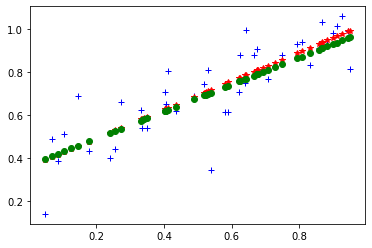

In [3]:
# Demo the above routines for a 2-D dataset.

m = 50
theta_true = generate_model (1)
(X, y) = generate_data (m, theta_true, sigma=0.1)

print ("Dimensions of X:", X.shape)
print ("Dimensions of theta_true:", theta_true.shape)
print ("Dimensions of y:", y.shape)

print ("Condition number of X: ", np.linalg.cond (X))
print ("True model coefficients:", theta_true.T)

theta = estimate_coeffs (X, y)

print ("Estimated model coefficients:", theta.T)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot (X[:, 1], y, 'b+') # Noisy observations
ax1.plot (X[:, 1], X.dot (theta), 'r*') # Fit
ax1.plot (X[:, 1], X.dot (theta_true), 'go') # True solution

**Benchmark varying $m$.** Let's benchmark the time to compute $x$ when the dimension $n$ of each point is fixed but the number $m$ of points varies. How does the running time scale with $m$?

In [4]:
# Benchmark, as 'm' varies:

n = 32 # dimension
M = [100, 1000, 10000, 100000, 1000000]
times = [0.] * len (M)
for (i, m) in enumerate (M):
    theta_true = generate_model (n)
    (X, y) = generate_data (m, theta_true, sigma=0.1)
    t = %timeit -o estimate_coeffs (X, y)
    times[i] = t.best

329 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.18 ms ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.63 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
103 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.02 s ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 0.98, 'Running time (fixed number of predictors)')

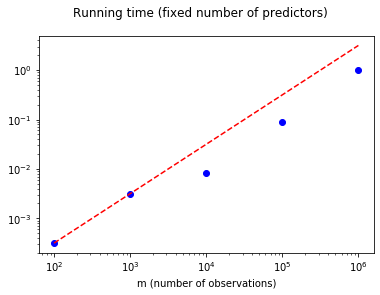

In [5]:
t_linear = [times[0]/M[0]*m for m in M]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (M, times, 'bo')
ax1.loglog (M, t_linear, 'r--')
ax1.set_xlabel ('m (number of observations)')
fig.suptitle ('Running time (fixed number of predictors)')

**Exercise 0** (ungraded). Now fix the number $m$ of observations but vary the dimension $n$. How does time scale with $n$? Complete the benchmark code below to find out. In particular, given the array `N[:]`, compute an array, `times[:]`, such that `times[i]` is the running time for a problem of size `m`$\times$`(N[i]+1)`.

> Hint: You can adapt the preceding benchmark. Also, note that the code cell following the one immediately below will plot your results against $\mathcal{O}(n)$ and $\mathcal{O}(n^2)$.

In [8]:
N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
m = 5000
times = [0.] * len (N)

# Implement a benchmark to compute the time,
# `times[i]`, to execute a problem of size `N[i]`.
for (i, n) in enumerate (N):
    theta_true = generate_model(n)
    (X, y) = generate_data(m, theta_true, sigma = 0.1)
    t = %timeit -o estimate_coeffs(X, y)
    times[i] = t.best


105 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
167 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
618 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.6 ms ± 85.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.06 ms ± 72.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.3 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.3 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
130 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
378 ms ± 17.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 s ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 0.98, 'Running time (fixed number of observations)')

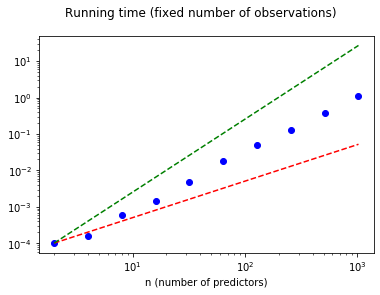

In [9]:
t_linear = [times[0]/N[0]*n for n in N]
t_quadratic = [times[0]/N[0]/N[0]*n*n for n in N]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (N, times, 'bo')
ax1.loglog (N, t_linear, 'r--')
ax1.loglog (N, t_quadratic, 'g--')
ax1.set_xlabel ('n (number of predictors)')
fig.suptitle ('Running time (fixed number of observations)')

Thus, the empirical scaling appears to be pretty reasonable, being roughly linear in $m$. And while being quadratic in $n$ sounds bad, one expects (or hopes!) that $n \ll \sqrt{m}$ in practical regression problems.

**Fin!** If you've gotten this far without errors, your notebook is ready to submit.